# The Transformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case a third degree polynomial: $f(x) = x^3$, in the interval $[0, C]$ where $C$ is a number that ensures that the function if properly normalized.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem:
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](https://pdg.lbl.gov/2023/reviews/rpp2023-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 30-11-2025 (latest update)

***

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats
plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

set the parameters of the program:

In [161]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000      # Number of random points used 

xmin = 0
xmax = 1.0            # Find out yourself what a good interval is.
N_bins = 100          # Find out yourself what a good number of bins is.

# f(x):
def fx_x3(x) :

    k = (xmax - xmin) / N_bins
    N = N_points * k
    return N * x**3

In [162]:
# Define the numpy arrays to be filled:
x_transformation = np.zeros(N_points)
x_accepted       = np.zeros(N_points)

In [163]:
x_transformation[:] = (4 * r.uniform(size = N_points))**(1/4)


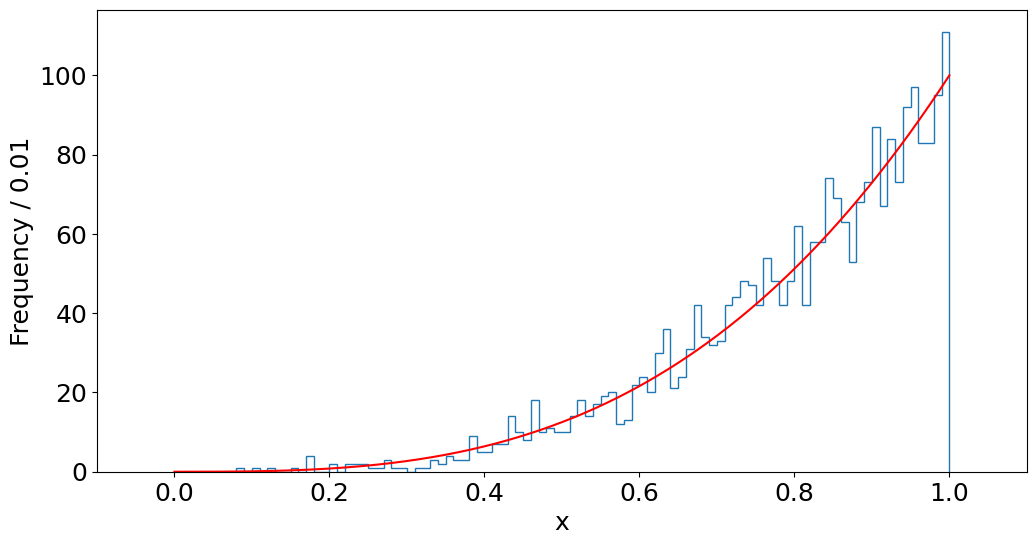

In [164]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x_transformation, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax.set(xlabel="x", ylabel="Frequency / 0.01", xlim=(xmin-0.1, xmax+0.1));

x_axis1 = np.linspace(xmin, xmax, 1000)
y_axis1 = fx_x3(x_axis1)
ax.plot(x_axis1, y_axis1, 'r-', label='function (not fitted)')


In [165]:
N_try = 0
ymin = xmin**3
ymax = xmax**3


for i in range(N_points):
    while True:
        N_try += 1

        x_test = r.uniform(xmin, xmax)

        y_test = r.uniform(ymin, ymax)

        if (y_test < x_test**3):
            break

    x_accepted[i] = x_test


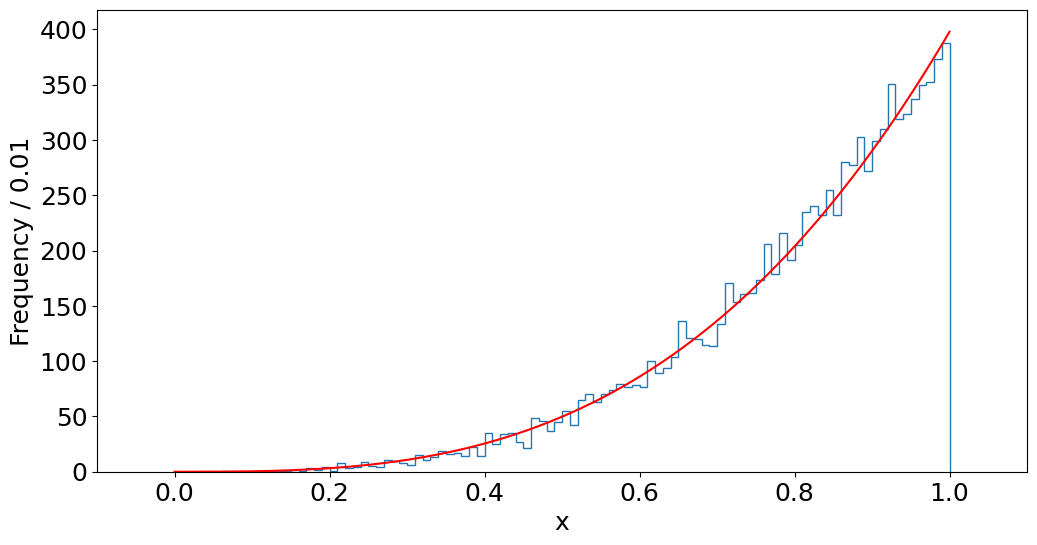

In [166]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x_accepted, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax.set(xlabel="x", ylabel="Frequency / 0.01", xlim=(xmin-0.1, xmax+0.1));

x_axis1 = np.linspace(xmin, xmax, 1000)
y_axis1 = fx_x3(x_axis1) * N_try / N_points
ax.plot(x_axis1, y_axis1, 'r-', label='function (not fitted)')


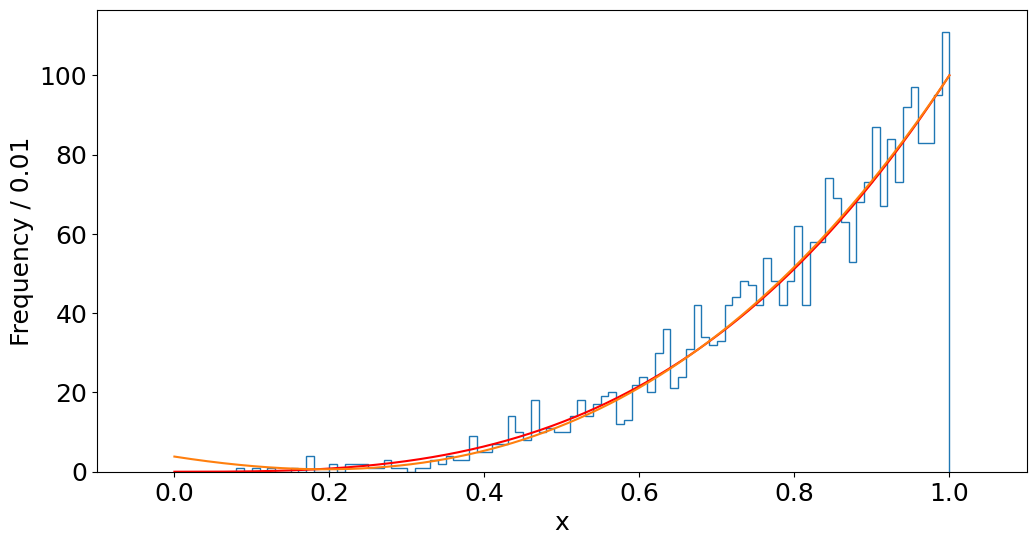

In [167]:
def poly3(x, a0, a1, a2, a3):
    return a0 + x * a1 + x**2 * a2 + x**3 * a3


hist_transformation, bin_edges = np.histogram(x_transformation, bins = N_bins, range = (xmin, xmax))
hist_accepted, _ = np.histogram(x_accepted, bins = N_bins, range = (xmin, xmax))


x = (bin_edges[1:] + bin_edges[:-1])/2

x = x[hist_transformation > 0]

s_transformation = np.sqrt(hist_transformation)

s_transformation = s_transformation[hist_transformation > 0]

s_accepted = np.sqrt(hist_accepted)

chi_fit = cost.LeastSquares(x, hist_transformation[hist_transformation > 0], s_transformation, poly3)
m_fit = Minuit(chi_fit, a0 = 0, a1 = 0, a2 = 0, a3 = 1)
m_fit.migrad()

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x_transformation, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax.set(xlabel="x", ylabel="Frequency / 0.01", xlim=(xmin-0.1, xmax+0.1));

x_axis1 = np.linspace(xmin, xmax, 1000)
y_axis1 = fx_x3(x_axis1)
ax.plot(x_axis1, y_axis1, 'r-', label='function (not fitted)')
ax.plot(x_axis1, poly3(x_axis1, *m_fit.values[:]))


## Problem: 

1) Calculate $C$ such that f(x) is normalised [Analytical problem].

2) Calculate the relevant integral (below) and inverted function for using the transformation method. Check that the limits actually makes sense [Analytical problem]. Note that it is important to include the limits!

$$F(x) = \int_{-\infty}^{x} f(x') dx'$$

3) Produce random points following $f(x) = x^3$, in the interval $[0, C]$ using **both** the Transformation and the Accept/Reject method.

4) Fit your data with a third degree polynomial, and check that the coefficients correspond to what you would expect.

5) Now try to change the interval from [0,C] to [1,C], and see how the limits change.

# Learning points:

As a basic principle, this exercise should make you capable of using two methods for generating random numbers according to a 1D PDF f(x) based on uniform random numbers (provided by a standard algorithm):
1. Transformation method (using integral+inverse of f(x))
2. Accept-Reject method (using sampling in 2D compared to f(x))

You should know:
1. The advantages and limitations of each method.
2. How to get the desired result out of each method.

Finally, you should understand the motivation behind generating random numbers according to a given distribution, namely for simulating complicated situations (e.g. experimental setup), and evaluating the outcome.